# <font color='white'>**IA aumentada: previsión de atrasos de vuelos**</h1>

El tema de discusión será la optimización aeroportuaria. El problema de negocios consiste en prever el atraso de los vuelos para optimizar los procesos operativos del aeropuerto.

En esta primera fase del proyecto, nos concentraremos en desarrollar un modelo que permita prever el atraso en el menor tiempo posible. Esto significa que, si un vuelo se atrasa, tendremos un margen de tiempo para determinar si realmente saldrá en el horario previsto, mejorando la experiencia de los usuarios y reduciendo costos operacionales para las aerolíneas y los aeropuertos.

## <font color='green'>**Entendiendo el conjunto de datos**</h1> 

### Cargando el conjunto de datos ###

In [93]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [94]:
datos = pd.read_csv("flights.csv")

In [95]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [96]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [97]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [98]:
datos.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


### Analisis Visual

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

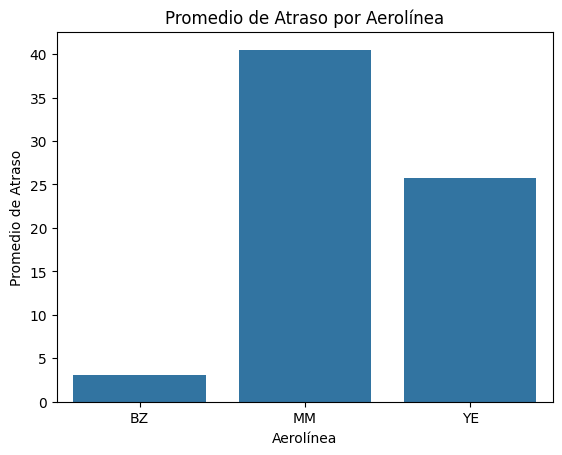

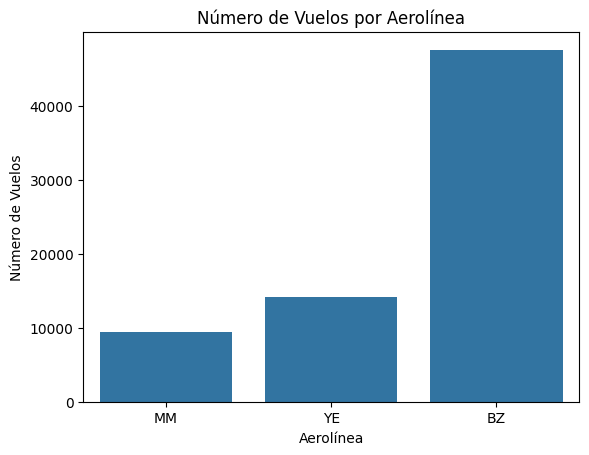

In [100]:
avg_delay = datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline",
            y="delay", 
            data=avg_delay,
            legend=False)
plt.xlabel("Aerolínea")
plt.ylabel("Promedio de Atraso")
plt.title("Promedio de Atraso por Aerolínea")
plt.show()

sns.countplot(x="airline", 
              data=datos, 
              legend=False)
plt.xlabel("Aerolínea")
plt.ylabel("Número de Vuelos")
plt.title("Número de Vuelos por Aerolínea")
plt.show()

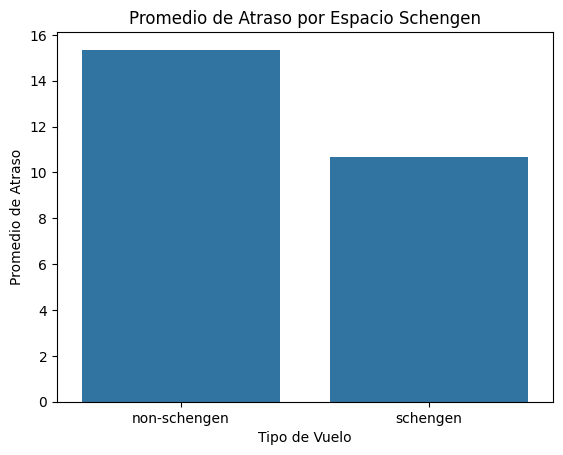

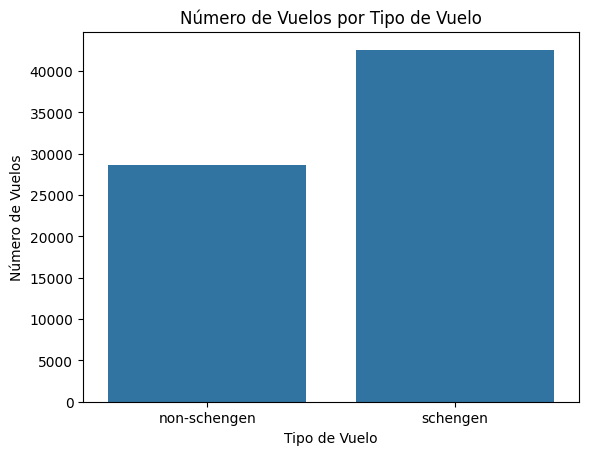

In [101]:
avg_schengen = datos.groupby("schengen")["delay"].mean().reset_index()
sns.barplot(x ="schengen",
            y="delay", 
            data=avg_schengen,
            legend=False)
plt.xlabel("Tipo de Vuelo")
plt.ylabel("Promedio de Atraso")
plt.title("Promedio de Atraso por Espacio Schengen")
plt.show()

sns.countplot(x="schengen", 
              data=datos, 
              legend=False)
plt.xlabel("Tipo de Vuelo")
plt.ylabel("Número de Vuelos")
plt.title("Número de Vuelos por Tipo de Vuelo")
plt.show()

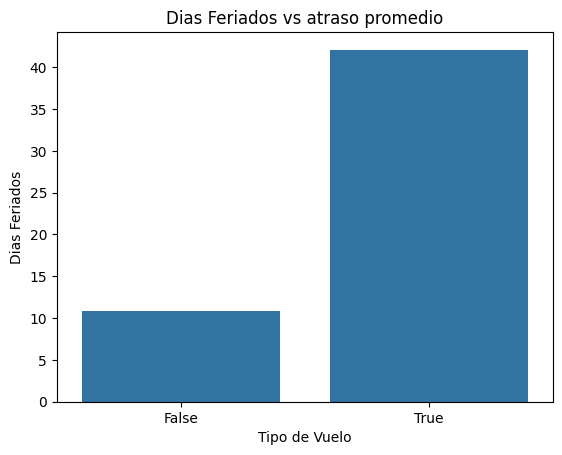

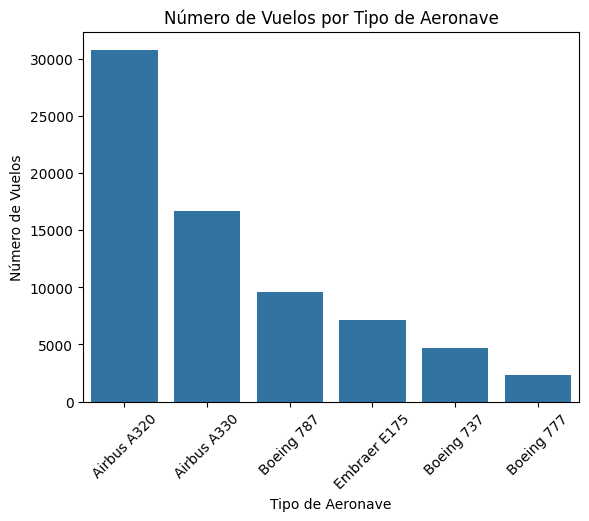

In [102]:
avg_holiday = datos.groupby("is_holiday")["delay"].mean().reset_index()
sns.barplot(x="is_holiday",
            y="delay", 
            data=avg_holiday,
            legend=False)
plt.xlabel("Tipo de Vuelo")
plt.ylabel("Dias Feriados")
plt.title("Dias Feriados vs atraso promedio")
plt.show()

order = datos['aircraft_type'].value_counts().index
sns.countplot(x="aircraft_type", 
              data=datos,
              order=order,
              legend=False)
plt.xticks(rotation=45)
plt.xlabel("Tipo de Aeronave")
plt.ylabel("Número de Vuelos")
plt.title("Número de Vuelos por Tipo de Aeronave")
plt.show()

### Analizando la distribucion de los datos 

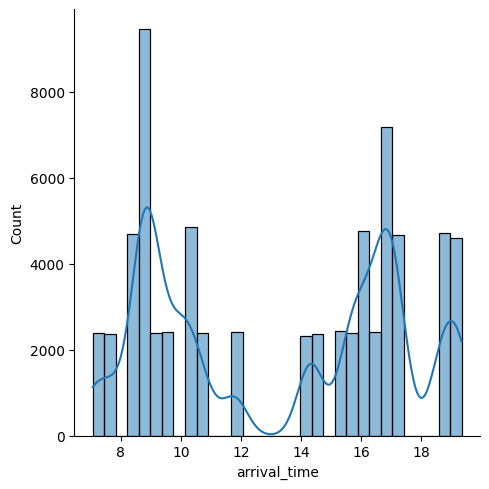

In [103]:
sns.displot(data=datos,
            x = 'arrival_time',
            kde = True)

In [104]:
import numpy as np

In [105]:
def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75, 25])
    iqr = q75 - q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

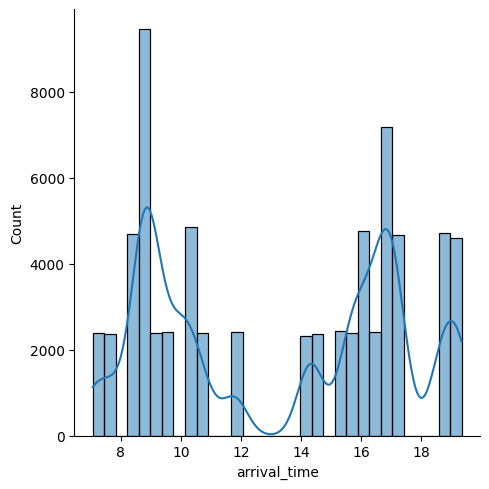

In [106]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.displot(data=datos,
            x = 'arrival_time',
            kde = True,
            binwidth=binwidth)

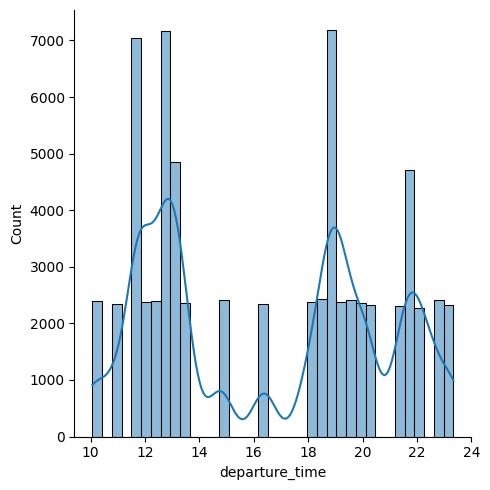

In [107]:
binwidth = ancho_bin(datos, 'departure_time')
sns.displot(data=datos,
            x = 'departure_time',
            kde = True,
            binwidth=binwidth)

In [108]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

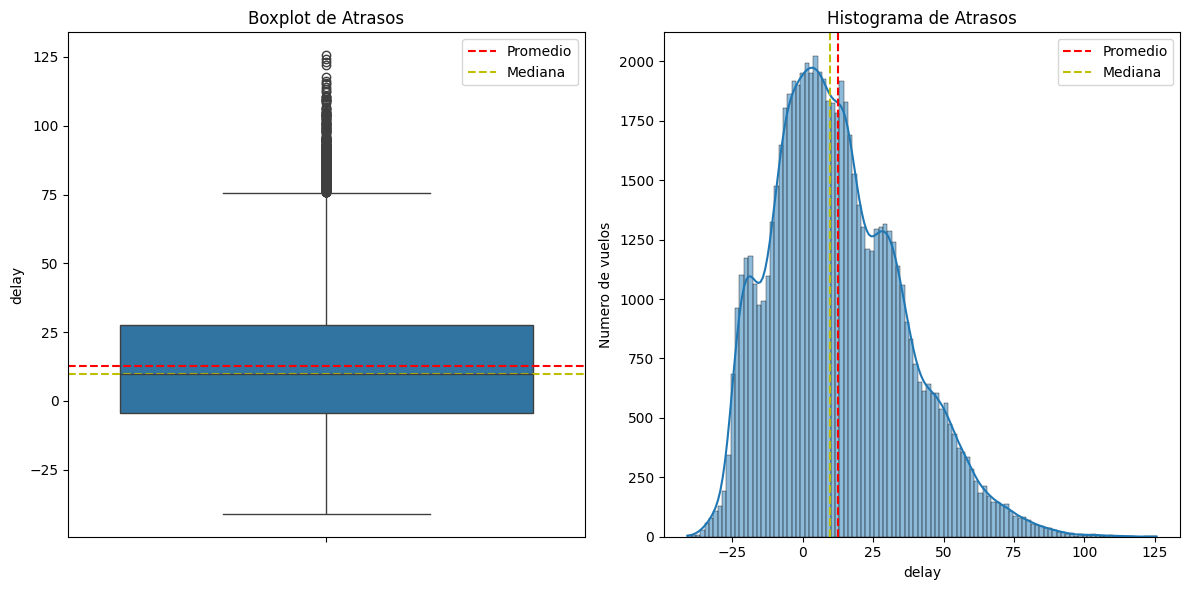

In [109]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
sns.boxplot(data = datos,
            y = 'delay',
            ax=ax[0])
ax[0].set_title("Boxplot de Atrasos")
ax[0].axhline(atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].axhline(atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[0].legend()

sns.histplot(data=datos,
             x='delay',
             kde=True,
             ax=ax[1],
             binwidth = ancho_bin(datos, 'delay'))
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title("Histograma de Atrasos")
ax[1].axvline(atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()
plt.tight_layout()
plt.show()

## <font color='green'>**Feature Engineering**</h1> 

### Creando nuevas columnas

In [110]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [111]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [112]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
32451,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,338,2015,False,-12.684215,2015-12-05,True,Saturday
42412,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,272,2017,False,4.669246,2017-09-30,True,Saturday
57489,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,182,2020,False,14.625806,2020-07-01,False,Wednesday
36396,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,236,2016,False,-1.978010,2016-08-24,False,Wednesday
69884,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,278,2022,False,-13.908814,2022-10-06,False,Thursday


### Feature Encoding

In [113]:
datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
25506,30,BZ,Embraer E175,1,PUA,8.923441,12.923441,240,2014,0,-6.343698,2014-08-29,0,Friday
67805,18,BZ,Airbus A320,1,TZF,14.258911,20.258911,140,2022,0,13.335900,2022-05-21,1,Saturday
55643,10,YE,Airbus A320,0,TCY,8.939996,11.939996,59,2020,0,23.259800,2020-02-29,1,Saturday
62488,14,BZ,Airbus A330,1,ZQO,7.708301,11.708301,150,2021,1,10.237461,2021-05-31,0,Monday
20847,29,BZ,Boeing 737,1,ZQO,8.591208,11.591208,294,2013,0,41.175170,2013-10-22,0,Tuesday


In [117]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
datos_codificados = pd.get_dummies(data = datos, columns = categoricas, dtype=int)
datos_codificados.sample(5)


,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
29764,29,1,8.591208,11.591208,159,2015,0,-1.539288,2015-06-09,0,...,0,0,1,0,0,0,0,0,1,0
11184,5,1,9.344097,12.344097,15,2012,0,-0.966702,2012-01-16,0,...,0,0,1,0,1,0,0,0,0,0
67075,27,1,14.376052,16.376052,91,2022,1,48.834617,2022-04-02,1,...,0,0,0,0,0,1,0,0,0,0
2816,8,1,15.729617,18.729617,187,2010,0,-9.061345,2010-07-07,0,...,0,0,1,0,0,0,0,0,0,1
31863,11,0,10.177197,13.177197,299,2015,0,2.050690,2015-10-27,0,...,0,0,0,0,0,0,0,0,1,0


In [118]:
datos[['arrival_time', 'departure_time']].corr()


,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [119]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year','date'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
29669,0,16.571894,0,2.927941,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
47734,1,11.781391,0,-16.937479,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2382,0,10.177197,0,-9.180587,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
62995,0,8.794147,0,7.570943,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
65115,1,8.923441,0,-7.363276,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## <font color='green'>**Seleccion y validacion del modelo**</h1> 

### Definiendo una baseline

In [121]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [122]:
X = df.drop(columns=['delay'], axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
y_pred = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {'MAE': round(mae, 4), 
                'RMSE': round(mse**(1/2), 4), 
                'R2': round(r2, 4)}
    return metricas

res_baseline = calcular_regresion(y_test, y_pred)
res_baseline

{'MAE': 18.5646, 'RMSE': 23.1612, 'R2': -0.0}

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
y_pred_RandomForest = modelo.predict(X_test)

res_modelo_RandomForest = calcular_regresion(y_test, y_pred_RandomForest)
res_modelo_RandomForest

{'MAE': 11.0262, 'RMSE': 13.7479, 'R2': 0.6477}

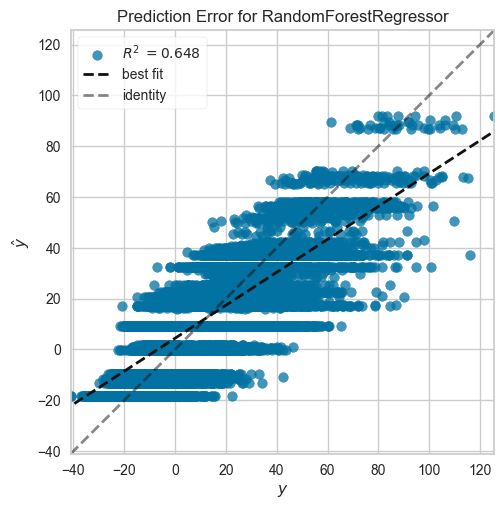

In [130]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)



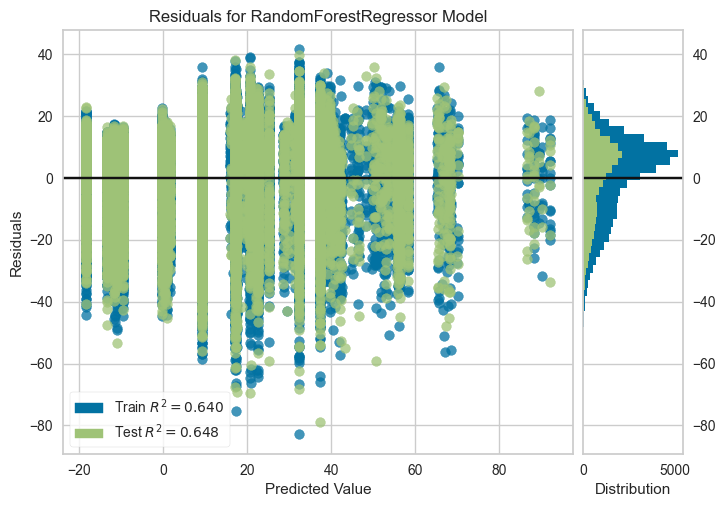

In [131]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

### Realizando cross validation

In [134]:
from sklearn.model_selection import KFold, cross_validate

In [135]:
scoring = {'RMSE': 'neg_root_mean_squared_error', 
           'MAE': 'neg_mean_absolute_error', 
           'R2': 'r2'}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_res = cross_validate(modelo, X_train, y_train, cv=kf, scoring=scoring)
kf_res

{'fit_time': array([3.26206565, 3.4289372 , 3.67807317, 3.60171247, 3.43105078]),
 'score_time': array([0.05940151, 0.07081294, 0.06341672, 0.08078361, 0.06981516]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

## <font color='green'>**Optimizacion de Hiperparametros**</h1> 

### Feature importance

In [138]:
importancia  = modelo.feature_importances_

In [140]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importance': (importancia*100).round(2)}).sort_values('Importance', ascending=False)
feature_importances

,Features,Importance
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [143]:
resultados =pd.DataFrame(index = ['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred_sel = model_features.predict(X_test_sel)
    metrics = calcular_regresion(y_test, y_pred_sel)
    resultados[f'Seleccion {i}'] = list(metrics.values())
    
resultados

,Seleccion 1,Seleccion 5,Seleccion 10,Seleccion 15,Seleccion 20,Seleccion 25,Seleccion 30
RMSE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
MAE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [144]:
resultados =pd.DataFrame(index = ['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,15)

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred_sel = model_features.predict(X_test_sel)
    metrics = calcular_regresion(y_test, y_pred_sel)
    resultados[f'Seleccion {i}'] = list(metrics.values())
    
resultados

,Seleccion 10,Seleccion 11,Seleccion 12,Seleccion 13,Seleccion 14
RMSE,11.0422,11.0425,11.0312,11.0314,11.0285
MAE,13.7587,13.7564,13.7526,13.7526,13.7497
R2,0.6471,0.6472,0.6474,0.6474,0.6476


In [145]:
selected_features = feature_importances['Features'].values[:i]
X_sel_features = X[selected_features]
X_sel_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL,aircraft_type_Boeing 737
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0,0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_sel_features, y, random_state=42)

### Optimizando hiperparámetros con GridSearchCV

In [147]:
param_grid = {'max_depth': [5, 10,15], 
              'min_samples_leaf': [1,2,3],
              'min_samples_split': [2,4,6],
              'n_estimators': [100,150, 200]
              }

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='r2')

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [150]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [151]:
y_pred_grid = model_grid.predict(X_test)
metrics_model_grid = calcular_regresion(y_test, y_pred_grid)
metrics_model_grid

{'MAE': 10.6295, 'RMSE': 13.2308, 'R2': 0.6754}

In [152]:
resultados['modelo_grid'] = list(metrics_model_grid.values())
resultados

,Seleccion 10,Seleccion 11,Seleccion 12,Seleccion 13,Seleccion 14,modelo_grid
RMSE,11.0422,11.0425,11.0312,11.0314,11.0285,10.6295
MAE,13.7587,13.7564,13.7526,13.7526,13.7497,13.2308
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6754


### Serializando el modelo


In [153]:
import pickle

In [154]:
with open('Champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
    
print("Modelo Grid guardado como Champion.pkl")

Modelo Grid guardado como Champion.pkl
